In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
import catboost
import xam

In [4]:
data = pd.read_csv('train.csv')
testdata = pd.read_csv("test.csv")
sample_sub = pd.read_csv('sample_submission2.csv')

In [5]:
data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [6]:
data.nunique()
testdata.nunique()

EmployeeNo                             16496
Division                                   9
Qualification                              3
Gender                                     2
Channel_of_Recruitment                     3
Trainings_Attended                         9
Year_of_birth                             44
Last_performance_score                     6
Year_of_recruitment                       33
Targets_met                                2
Previous_Award                             2
Training_score_average                    60
State_Of_Origin                           37
Foreign_schooled                           2
Marital_Status                             3
Past_Disciplinary_Action                   2
Previous_IntraDepartmental_Movement        2
No_of_previous_employers                   7
dtype: int64

In [7]:
data.describe()
testdata.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average
count,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000
mean,2.251455,1986.161130,7.692016,2013.122393,0.349600,0.023218,55.433863
std,0.608865,7.708188,3.734303,4.273649,0.476858,0.150599,13.392306
min,2.000000,1958.000000,0.000000,1986.000000,0.000000,0.000000,31.000000
25%,2.000000,1982.000000,5.000000,2011.000000,0.000000,0.000000,43.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000


In [8]:
data.shape
testdata.shape

(16496, 18)

In [9]:
data.drop(columns='EmployeeNo', axis=1, inplace=True)
testdata.drop(columns='EmployeeNo', axis=1, inplace=True)

In [10]:
data.dtypes
testdata.dtypes

Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
dtype: object

In [11]:
cat_col = data.select_dtypes(exclude=['int64','float64']).columns
cat_col = list(cat_col)
cat_col

cat_col = testdata.select_dtypes(exclude=['int64','float64']).columns
cat_col = list(cat_col)
cat_col

['Division',
 'Qualification',
 'Gender',
 'Channel_of_Recruitment',
 'State_Of_Origin',
 'Foreign_schooled',
 'Marital_Status',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement',
 'No_of_previous_employers']

In [12]:
for col in cat_col:
    print("Value count for {}".format(col))
    print(data[col].nunique())
    print("___"*20)
    
for col in cat_col:
    print("Value count for {}".format(col))
    print(testdata[col].nunique())
    print("___"*20)

Value count for Division
9
____________________________________________________________
Value count for Qualification
3
____________________________________________________________
Value count for Gender
2
____________________________________________________________
Value count for Channel_of_Recruitment
3
____________________________________________________________
Value count for State_Of_Origin
37
____________________________________________________________
Value count for Foreign_schooled
2
____________________________________________________________
Value count for Marital_Status
3
____________________________________________________________
Value count for Past_Disciplinary_Action
2
____________________________________________________________
Value count for Previous_IntraDepartmental_Movement
2
____________________________________________________________
Value count for No_of_previous_employers
7
____________________________________________________________
Value count for Divisi

In [13]:
num_col = data.select_dtypes(exclude=['object']).columns
num_col = list(num_col)
num_col

num_col = testdata.select_dtypes(exclude=['object']).columns
num_col = list(num_col)
num_col

['Trainings_Attended',
 'Year_of_birth',
 'Last_performance_score',
 'Year_of_recruitment',
 'Targets_met',
 'Previous_Award',
 'Training_score_average']

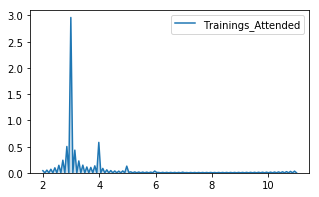

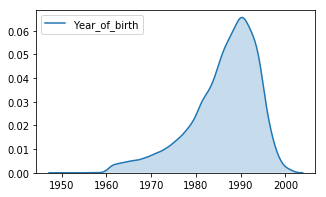

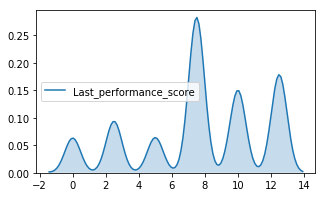

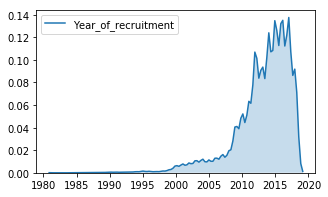

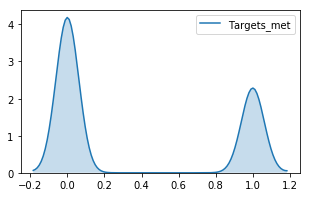

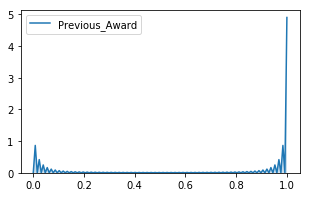

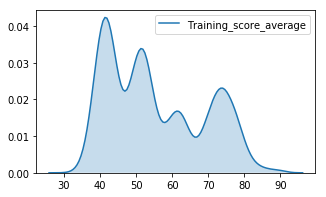

In [218]:
for num in num_col:
    fig = plt.figure(figsize=(5,3))
    ax = fig.gca()
    sns.kdeplot(data[num], ax=ax,shade=True)

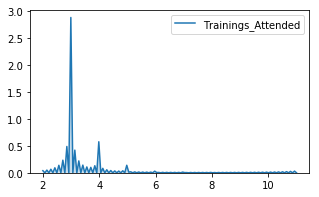

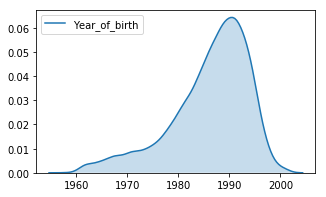

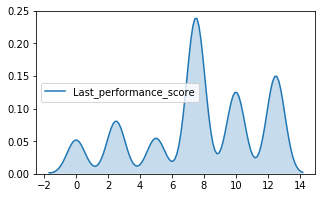

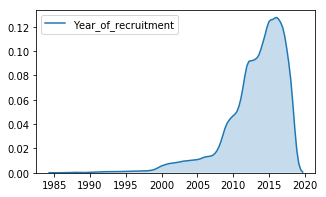

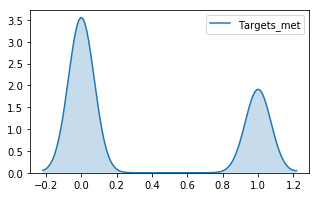

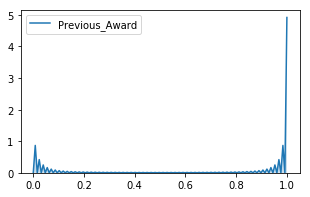

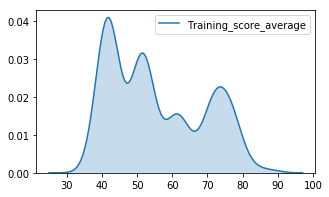

In [219]:
for num in num_col:
    fig = plt.figure(figsize=(5,3))
    ax = fig.gca()
    sns.kdeplot(testdata[num], ax=ax,shade=True)

In [14]:
data['Trainings_Attended'] = np.log1p(data["Trainings_Attended"])
data['Year_of_recruitment'] = np.log1p(data["Year_of_recruitment"])
data['Year_of_birth'] = np.log1p(data["Year_of_birth"])





testdata["Trainings_Attended"] = np.log1p(testdata["Trainings_Attended"])
testdata['Year_of_recruitment'] = np.log1p(testdata["Year_of_recruitment"])
testdata['Year_of_birth'] = np.log1p(testdata["Year_of_birth"])



In [15]:
data.isnull().sum()

Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [16]:
print("Number of people  having  First degree and HND")
S = data[data["Qualification"] == "First Degree or HND"].shape[0]
print(S)

print("Number of people  having MSc, MBA and PhD")
C = data[data["Qualification"] == "MSc, MBA and PhD"].shape[0]
print(C )

print("Number of Non-University Education")
Q = data[data["Qualification"] == "Non-University Education"].shape[0]
print(Q)

# S has the highest, now lets fill it with S
data['Qualification'] = data['Qualification'].fillna("S")


print("Number of people  having  First degree and HND")
S = testdata[testdata["Qualification"] == "First Degree or HND"].shape[0]
print(S)

print("Number of people  having MSc, MBA and PhD")
C = testdata[testdata["Qualification"] == "MSc, MBA and PhD"].shape[0]
print(C )

print("Number of Non-University Education")
Q = testdata[testdata["Qualification"] == "Non-University Education"].shape[0]
print(Q)

# S has the highest, now lets fill it with S
testdata['Qualification'] = testdata['Qualification'].fillna("S")


Number of people  having  First degree and HND
25578
Number of people  having MSc, MBA and PhD
10469
Number of Non-University Education
586
Number of people  having  First degree and HND
11091
Number of people  having MSc, MBA and PhD
4456
Number of Non-University Education
219


In [16]:
data.isnull().sum()
testdata.isnull().sum()

Division                                 0
Qualification                          730
Gender                                   0
Channel_of_Recruitment                   0
Trainings_Attended                       0
Year_of_birth                            0
Last_performance_score                   0
Year_of_recruitment                      0
Targets_met                              0
Previous_Award                           0
Training_score_average                   0
State_Of_Origin                          0
Foreign_schooled                         0
Marital_Status                           0
Past_Disciplinary_Action                 0
Previous_IntraDepartmental_Movement      0
No_of_previous_employers                 0
dtype: int64

In [27]:
mean_e = xam.feature_extraction.BayesianTargetEncoder(columns=cat_col)

In [29]:
mean_e

BayesianTargetEncoder(columns=['Division', 'Qualification', 'Gender',
                               'Channel_of_Recruitment', 'State_Of_Origin',
                               'Foreign_schooled', 'Marital_Status',
                               'Past_Disciplinary_Action',
                               'Previous_IntraDepartmental_Movement',
                               'No_of_previous_employers'],
                      prior_weight=100, suffix='_mean')

In [23]:
all_data = pd.concat([data,testdata])

In [24]:
all_data.columns

Index(['Channel_of_Recruitment', 'Division', 'Foreign_schooled', 'Gender',
       'Last_performance_score', 'Marital_Status', 'No_of_previous_employers',
       'Past_Disciplinary_Action', 'Previous_Award',
       'Previous_IntraDepartmental_Movement', 'Promoted_or_Not',
       'Qualification', 'State_Of_Origin', 'Targets_met',
       'Training_score_average', 'Trainings_Attended', 'Year_of_birth',
       'Year_of_recruitment'],
      dtype='object')

In [25]:
all_data.head()

,Channel_of_Recruitment,Division,Foreign_schooled,Gender,Last_performance_score,Marital_Status,No_of_previous_employers,Past_Disciplinary_Action,Previous_Award,Previous_IntraDepartmental_Movement,Promoted_or_Not,Qualification,State_Of_Origin,Targets_met,Training_score_average,Trainings_Attended,Year_of_birth,Year_of_recruitment
0,Direct Internal process,Commercial Sales and Marketing,No,Female,12.5,Married,0,No,0,No,0.0,"MSc, MBA and PhD",ANAMBRA,1,41,1.098612,7.594381,7.606885
1,Agency and others,Customer Support and Field Operations,Yes,Male,12.5,Married,0,No,0,No,0.0,First Degree or HND,ANAMBRA,0,52,1.098612,7.596894,7.608871
2,Direct Internal process,Commercial Sales and Marketing,Yes,Male,7.5,Married,0,No,0,No,0.0,First Degree or HND,KATSINA,0,42,1.098612,7.594884,7.607381
3,Agency and others,Commercial Sales and Marketing,Yes,Male,2.5,Single,1,No,0,No,0.0,First Degree or HND,NIGER,0,42,1.386294,7.592366,7.605890
4,Direct Internal process,Information and Strategy,Yes,Male,7.5,Married,1,No,0,No,0.0,First Degree or HND,AKWA IBOM,0,77,1.386294,7.596392,7.607381


In [26]:
all_data.head()

,Channel_of_Recruitment,Division,Foreign_schooled,Gender,Last_performance_score,Marital_Status,No_of_previous_employers,Past_Disciplinary_Action,Previous_Award,Previous_IntraDepartmental_Movement,Promoted_or_Not,Qualification,State_Of_Origin,Targets_met,Training_score_average,Trainings_Attended,Year_of_birth,Year_of_recruitment
0,Direct Internal process,Commercial Sales and Marketing,No,Female,12.5,Married,0,No,0,No,0.0,"MSc, MBA and PhD",ANAMBRA,1,41,1.098612,7.594381,7.606885
1,Agency and others,Customer Support and Field Operations,Yes,Male,12.5,Married,0,No,0,No,0.0,First Degree or HND,ANAMBRA,0,52,1.098612,7.596894,7.608871
2,Direct Internal process,Commercial Sales and Marketing,Yes,Male,7.5,Married,0,No,0,No,0.0,First Degree or HND,KATSINA,0,42,1.098612,7.594884,7.607381
3,Agency and others,Commercial Sales and Marketing,Yes,Male,2.5,Single,1,No,0,No,0.0,First Degree or HND,NIGER,0,42,1.386294,7.592366,7.605890
4,Direct Internal process,Information and Strategy,Yes,Male,7.5,Married,1,No,0,No,0.0,First Degree or HND,AKWA IBOM,0,77,1.386294,7.596392,7.607381


In [33]:
data = all_data[0:38312]
testdata = all_data[38312:]


In [34]:
testdata.drop(columns='Promoted_or_Not', inplace=True)

In [35]:
X = data.loc[:, data.columns != 'Promoted_or_Not']
y = data.loc[:, data.columns == 'Promoted_or_Not']

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(testdata)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.22, random_state = 1)

In [40]:
from sklearn.metrics import f1_score

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier

In [45]:
Cb = CatBoostClassifier(random_state=1)
Cb.fit(X_train,y_train)
Cb_pred = Cb.predict(X_test)

Learning rate set to 0.04382
0:	learn: 0.6421096	total: 269ms	remaining: 4m 28s
1:	learn: 0.5988781	total: 523ms	remaining: 4m 21s
2:	learn: 0.5584839	total: 754ms	remaining: 4m 10s
3:	learn: 0.5219635	total: 950ms	remaining: 3m 56s
4:	learn: 0.4934074	total: 1.15s	remaining: 3m 48s
5:	learn: 0.4687448	total: 1.34s	remaining: 3m 42s
6:	learn: 0.4451017	total: 1.53s	remaining: 3m 36s
7:	learn: 0.4249371	total: 1.73s	remaining: 3m 33s
8:	learn: 0.3965271	total: 1.9s	remaining: 3m 28s
9:	learn: 0.3783329	total: 2.09s	remaining: 3m 26s
10:	learn: 0.3649048	total: 2.27s	remaining: 3m 24s
11:	learn: 0.3501494	total: 2.46s	remaining: 3m 22s
12:	learn: 0.3352884	total: 2.66s	remaining: 3m 21s
13:	learn: 0.3244945	total: 2.86s	remaining: 3m 21s
14:	learn: 0.3063526	total: 3.02s	remaining: 3m 18s
15:	learn: 0.2995244	total: 3.18s	remaining: 3m 15s
16:	learn: 0.2885580	total: 3.32s	remaining: 3m 12s
17:	learn: 0.2833590	total: 3.48s	remaining: 3m 9s
18:	learn: 0.2789427	total: 3.61s	remaining: 3m

In [46]:
f1_score(Cb_pred, y_test)

0.5025641025641027

# DECISION TREE

In [242]:
Dc_model = DecisionTreeClassifier(random_state=1)

In [243]:
Dc_model.fit(X_train,y_train)
Dc_pred = Dc_model.predict(X_test)

In [244]:
f1_score(Dc_pred, y_test)

0.40888308295231873

# RANDOM FOREST

In [263]:
Rf = RandomForestClassifier(random_state=1,n_estimators=800,max_depth=6)
Rf.fit(X_train,y_train)
Rf_pred = Rf.predict(X_test)
f1_score(Rf_pred, y_test)

0.18181818181818182

# XG_BOOST

In [246]:
xgb= XGBClassifier(random_state=1)

In [247]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2,
              learning_rate=0.75, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0.6, reg_lambda=0.8, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [248]:
xgb_pred = xgb.predict(X_test)

In [249]:
f1_score(xgb_pred, y_test)

0.4816053511705686

# LIGHT_GBM

In [54]:
from lightgbm import LGBMClassifier

In [55]:
lgb = LGBMClassifier(random_state=1)

In [56]:
lgb.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [57]:
lgb_pred = lgb.predict(X_test)

In [58]:
f1_score(lgb_pred,y_test)

0.490216271884655

In [48]:
final_pred = Cb.predict(test)
final_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
sample_sub.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/34385,1
1,YAK/S/27825,1
2,YAK/S/23870,1
3,YAK/S/54784,1
4,YAK/S/25058,1


In [50]:
sample_sub['Promoted_or_Not'] = final_pred


In [51]:
sample_sub['Promoted_or_Not'] = sample_sub['Promoted_or_Not'].astype('int64')

In [52]:
sample_sub.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/34385,0
1,YAK/S/27825,0
2,YAK/S/23870,0
3,YAK/S/54784,0
4,YAK/S/25058,0


In [53]:
sample_sub.to_csv("UsingCatWithoutMeanEncode1st.csv", index=False)